In [2]:
#tools for data loading and wrangling
import numpy as np
import pandas as pd
import random as rnd #specifically for wrangling(random impuation?)

#tools for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#important tools
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import f1_score
from sklearn.preprocessing import RobustScaler

#our models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

import warnings
warnings.filterwarnings('ignore')

#cross_validation_tools
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.metrics import confusion_matrix
#power house stacking
from sklearn.ensemble import StackingClassifier

In [3]:
#loading the files
train_data=pd.read_csv('train_bank.csv')
test_data=pd.read_csv('test_bank.csv')

In [172]:
#lets get an overview of our data
train_data.head(10)

,Loan_ID,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Gender,Interest_Rate
0,10000001,"7,000",< 1 year,Rent,68000.0,not verified,car,18.37,0,NaN,9,14,Female,1
1,10000002,"30,000",4 years,Mortgage,NaN,VERIFIED - income,debt_consolidation,14.93,0,17.0,12,24,Female,3
2,10000003,"24,725",7 years,Mortgage,75566.4,VERIFIED - income source,debt_consolidation,15.88,0,NaN,12,16,Male,3
3,10000004,"16,000",< 1 year,NaN,56160.0,VERIFIED - income source,debt_consolidation,14.34,3,NaN,16,22,Male,3
4,10000005,"17,000",8 years,Own,96000.0,VERIFIED - income source,debt_consolidation,22.17,1,NaN,19,30,Female,1
5,10000006,"4,500",2 years,Rent,30000.0,VERIFIED - income source,credit_card,10.88,1,NaN,12,15,Male,3
6,10000007,"18,075",4 years,Rent,85000.0,VERIFIED - income,debt_consolidation,5.65,0,NaN,9,12,Male,3
7,10000008,"15,000",< 1 year,Rent,115000.0,VERIFIED - income,debt_consolidation,7.97,1,16.0,25,31,Female,2
8,10000009,"6,300",10+ years,Rent,NaN,not verified,debt_consolidation,16.12,3,NaN,8,9,Female,3
9,10000010,"30,000",10+ years,Own,163000.0,VERIFIED - income,debt_consolidation,11.13,0,NaN,24,43,Male,1


In [173]:
test_data.head()

,Loan_ID,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Gender
0,10164310,"27,500",10+ years,Mortgage,129000.0,VERIFIED - income,debt_consolidation,12.87,0,68.0,10,37,Male
1,10164311,"26,000",10+ years,NaN,110000.0,not verified,credit_card,11.37,0,NaN,6,23,Male
2,10164312,"6,075",< 1 year,Rent,75000.0,VERIFIED - income,debt_consolidation,6.83,2,NaN,5,20,Male
3,10164313,"12,000",10+ years,Mortgage,73000.0,VERIFIED - income source,debt_consolidation,7.76,0,NaN,6,8,Male
4,10164314,"35,000",< 1 year,Mortgage,156000.0,not verified,debt_consolidation,9.62,0,26.0,9,21,Male


In [174]:
#we can see some numeric features, categorical features and some missing values... lets dive deeper
train_data.shape, test_data.shape

((164309, 14), (109541, 13))

In [7]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164309 entries, 0 to 164308
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Loan_ID                  164309 non-null  int64  
 1   Loan_Amount_Requested    164309 non-null  object 
 2   Length_Employed          156938 non-null  object 
 3   Home_Owner               138960 non-null  object 
 4   Annual_Income            139207 non-null  float64
 5   Income_Verified          164309 non-null  object 
 6   Purpose_Of_Loan          164309 non-null  object 
 7   Debt_To_Income           164309 non-null  float64
 8   Inquiries_Last_6Mo       164309 non-null  int64  
 9   Months_Since_Deliquency  75930 non-null   float64
 10  Number_Open_Accounts     164309 non-null  int64  
 11  Total_Accounts           164309 non-null  int64  
 12  Gender                   164309 non-null  object 
 13  Interest_Rate            164309 non-null  int64  
dtypes: f

In [8]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109541 entries, 0 to 109540
Data columns (total 13 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Loan_ID                  109541 non-null  int64  
 1   Loan_Amount_Requested    109541 non-null  object 
 2   Length_Employed          104605 non-null  object 
 3   Home_Owner               92830 non-null   object 
 4   Annual_Income            92643 non-null   float64
 5   Income_Verified          109541 non-null  object 
 6   Purpose_Of_Loan          109541 non-null  object 
 7   Debt_To_Income           109541 non-null  float64
 8   Inquiries_Last_6Mo       109541 non-null  int64  
 9   Months_Since_Deliquency  50682 non-null   float64
 10  Number_Open_Accounts     109541 non-null  int64  
 11  Total_Accounts           109541 non-null  int64  
 12  Gender                   109541 non-null  object 
dtypes: float64(3), int64(4), object(6)
memory usage: 10.9+ MB


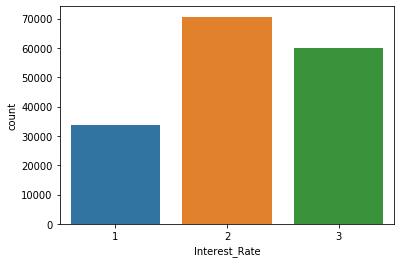

In [9]:
#we can see a lot of missing values in both train and test data... we need to be smart about handling them
sns.countplot(train_data['Interest_Rate'])#lets check the dstribution of classes

In [4]:
#its not biased towards any class... lets move on with our investigation
#we start by creating a table to show the missing values that we have for each feature
def missing_percentage(df):
    """This function takes a DataFrame(df) as input and returns two columns, total missing values and total missing values percentage"""
    total = df.isnull().sum().sort_values(ascending = False)
    percent = round(total/len(df)*100,2)#or round(total/len(df))
    return pd.concat([total, percent], axis=1, keys=['Total Missing','%Percent'])

In [11]:
missing_percentage(train_data)

,Total Missing,%Percent
Months_Since_Deliquency,88379,53.79
Home_Owner,25349,15.43
Annual_Income,25102,15.28
Length_Employed,7371,4.49
Interest_Rate,0,0.00
Gender,0,0.00
Total_Accounts,0,0.00
Number_Open_Accounts,0,0.00
Inquiries_Last_6Mo,0,0.00
Debt_To_Income,0,0.00


In [13]:
missing_percentage(test_data)

,Total Missing,%Percent
Months_Since_Deliquency,58859,53.73
Annual_Income,16898,15.43
Home_Owner,16711,15.26
Length_Employed,4936,4.51
Gender,0,0.00
Total_Accounts,0,0.00
Number_Open_Accounts,0,0.00
Inquiries_Last_6Mo,0,0.00
Debt_To_Income,0,0.00
Purpose_Of_Loan,0,0.00


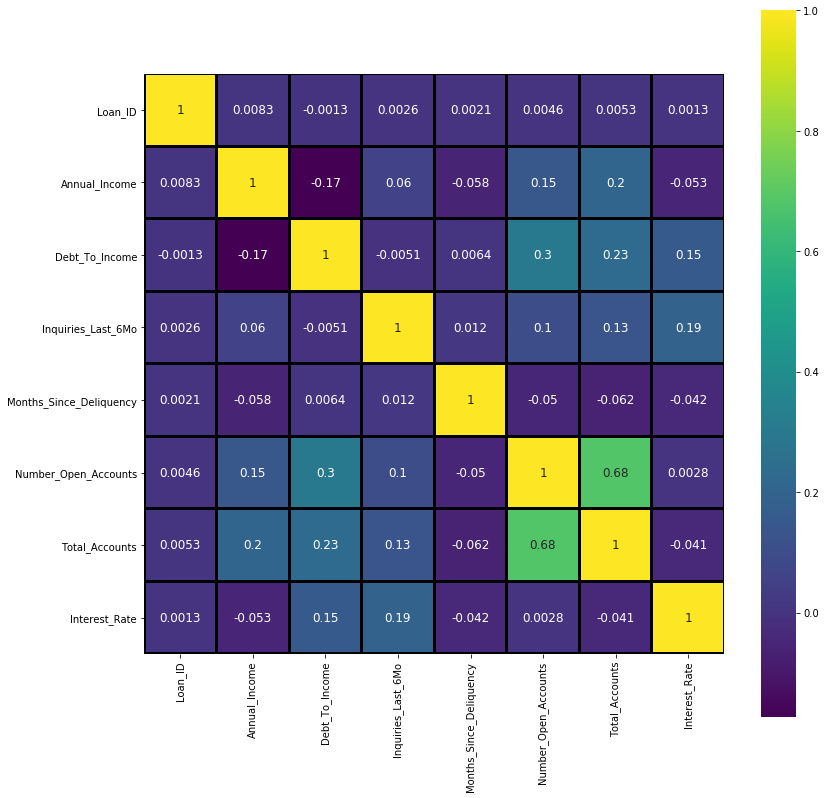

In [14]:
#a lot of missing values in  the test data too... lets quickliy get an overview of the features that are strongly related with the targget
fig,axs=plt.subplots(nrows=1,figsize=(13,13))
sns.heatmap(train_data.corr(),
           annot=True,square=True,cmap='viridis',
           linewidths=2,linecolor='black',annot_kws={'size':12})

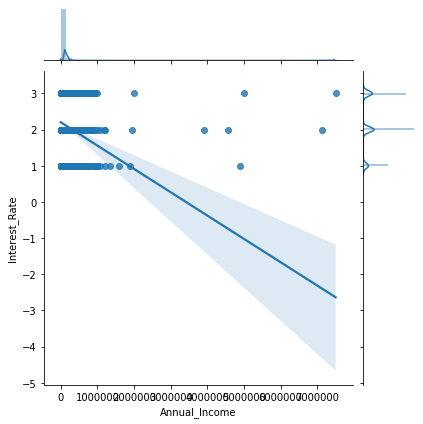

In [15]:
#number_open_accounts and Total_accounts are showing signs of multicolinearity(it makes sense)
#lets quickly deal with the missing values... i will quikly fill the annual income with the median(since it is not affected by outliers)
#lets use scatter plots to check for outliers before filling
sns.jointplot(train_data['Annual_Income'], train_data['Interest_Rate'], kind = 'reg')

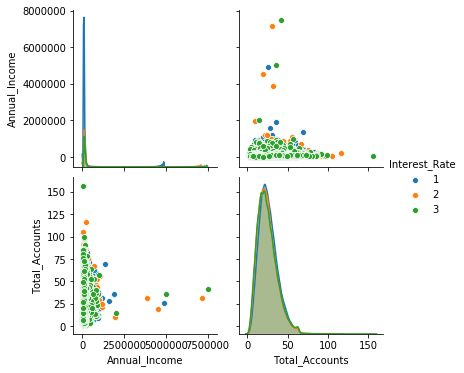

In [16]:
sns.pairplot(train_data, hue='Interest_Rate', vars= ['Annual_Income','Total_Accounts'])

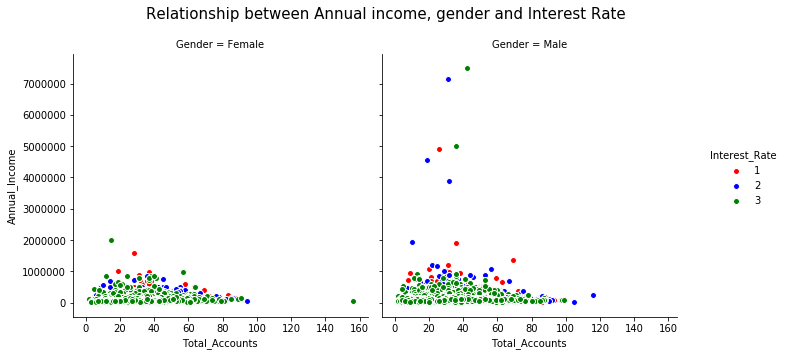

In [20]:
#we can clearly see outliers... lets get another beautiful visualization
pal = {3:"green", 2:"blue", 1:"red"}
g = sns.FacetGrid(train_data, size=5,hue="Interest_Rate", col ="Gender", margin_titles=True,
                palette=pal,)
g.map(plt.scatter, "Total_Accounts", "Annual_Income",edgecolor="w").add_legend()
g.fig.suptitle("Relationship between Annual income, gender and Interest Rate", size = 15)
plt.subplots_adjust(top=0.85)

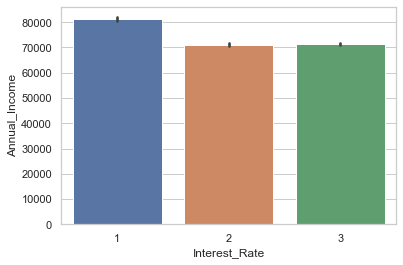

In [21]:
sns.set(style="whitegrid")
ax = sns.barplot(x="Interest_Rate", y="Annual_Income", data=train_data)

In [5]:
train_data = train_data.drop(train_data[(train_data['Annual_Income']>1250000) & (train_data['Total_Accounts']<120)].index).reset_index(drop=True)

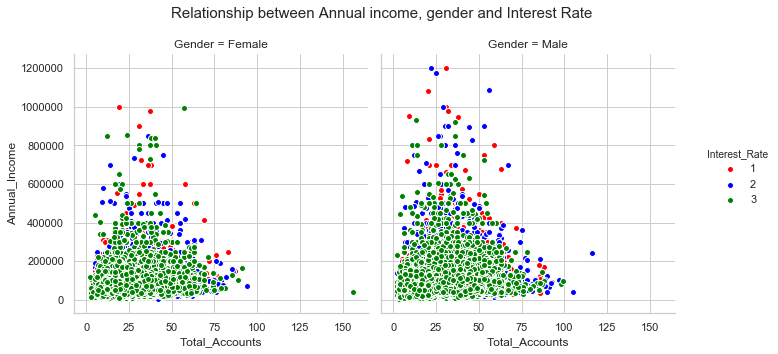

In [32]:
pal = {3:"green", 2:"blue", 1:"red"}
g = sns.FacetGrid(train_data, size=5,hue="Interest_Rate", col ="Gender", margin_titles=True,
                palette=pal,)
g.map(plt.scatter, "Total_Accounts", "Annual_Income",edgecolor="w").add_legend()
g.fig.suptitle("Relationship between Annual income, gender and Interest Rate", size = 15)
plt.subplots_adjust(top=0.85)

In [6]:
#checking the heat map above, we may have to drop the Number_of_Accounts... its highly correlated to the Total_Accountts
train_data.drop(['Number_Open_Accounts'], axis=1, inplace=True)#whenever you put inplace=True, dont set the action equal to any variable
test_data.drop(['Number_Open_Accounts'], axis=1, inplace=True)

In [7]:
train_data.shape, test_data.shape

((164298, 13), (109541, 12))

In [8]:
#we first take the mean of the fare related to each category in the Cabin column
train_data.groupby("Length_Employed")['Annual_Income'].mean().sort_values()

Length_Employed
< 1 year     67694.486632
1 year       69486.857814
2 years      70681.105977
4 years      70966.691081
5 years      71504.775976
6 years      72043.155295
3 years      72046.320002
7 years      72690.152705
9 years      73860.317171
8 years      73920.429239
10+ years    79905.443532
Name: Annual_Income, dtype: float64

In [9]:
#filing the annual income with mean
train_data.fillna(train_data.mean(), inplace=True)
test_data.fillna(test_data.mean(), inplace=True)

In [10]:
#the first two plots showed us the outliers in the data
#lets start with months with deliquency...
#deliquency is commonly used to describe a situation in which a borrower 
#misses their due date for a single scheduled payment for a form of financing
#with this definition, we can say that those that didnt fill had no payment deliquency...we can fill with 0
train_data["Months_Since_Deliquency"] = train_data["Months_Since_Deliquency"].fillna(0)
test_data["Months_Since_Deliquency"] = test_data["Months_Since_Deliquency"].fillna(0)

In [182]:
train_data['Months_Since_Deliquency'].isnull().sum()

0

In [183]:
train_data.head(10)

,Loan_ID,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Total_Accounts,Gender,Interest_Rate
0,10000001,"7,000",< 1 year,Rent,68000.000000,not verified,car,18.37,0,34.230744,14,Female,1
1,10000002,"30,000",4 years,Mortgage,73036.645136,VERIFIED - income,debt_consolidation,14.93,0,17.000000,24,Female,3
2,10000003,"24,725",7 years,Mortgage,75566.400000,VERIFIED - income source,debt_consolidation,15.88,0,34.230744,16,Male,3
3,10000004,"16,000",< 1 year,NaN,56160.000000,VERIFIED - income source,debt_consolidation,14.34,3,34.230744,22,Male,3
4,10000005,"17,000",8 years,Own,96000.000000,VERIFIED - income source,debt_consolidation,22.17,1,34.230744,30,Female,1
5,10000006,"4,500",2 years,Rent,30000.000000,VERIFIED - income source,credit_card,10.88,1,34.230744,15,Male,3
6,10000007,"18,075",4 years,Rent,85000.000000,VERIFIED - income,debt_consolidation,5.65,0,34.230744,12,Male,3
7,10000008,"15,000",< 1 year,Rent,115000.000000,VERIFIED - income,debt_consolidation,7.97,1,16.000000,31,Female,2
8,10000009,"6,300",10+ years,Rent,73036.645136,not verified,debt_consolidation,16.12,3,34.230744,9,Female,3
9,10000010,"30,000",10+ years,Own,163000.000000,VERIFIED - income,debt_consolidation,11.13,0,34.230744,43,Male,1


In [11]:
#lets fill up Home_owner column... lets call our beautiful estimator
train_data.groupby("Home_Owner")['Annual_Income'].mean().sort_values()

Home_Owner
Rent        63702.082493
Other       66274.601048
Own         67173.516345
None        70550.000000
Mortgage    81602.593272
Name: Annual_Income, dtype: float64

In [12]:
#lets fill with N the non available places
train_data.Home_Owner.fillna("N", inplace=True)
test_data.Home_Owner.fillna("N", inplace=True)

In [13]:
train_data.groupby("Home_Owner")['Annual_Income'].mean().sort_values()

Home_Owner
Rent        63702.082493
Other       66274.601048
Own         67173.516345
None        70550.000000
N           72811.937893
Mortgage    81602.593272
Name: Annual_Income, dtype: float64

In [14]:
#lets call our estimator function...
def home_estimator(i):
    """Grouping Cabin feature by the first letter"""
    a = 0
    if i<63000:
        a = "Rent"
    elif i>=63000 and i<66000:
        a = "Other"
    elif i>=66000 and i<70000:
        a = "Own"
    elif i>=70000 and i<83000:
        a = "None"
    else:
        a = "Mortgage"
    return a
    

In [15]:
#lets apply this Home estimator to the null values in Home_Owner feature
train_home_with_N = train_data[train_data.Home_Owner == "N"]
test_home_with_N=test_data[test_data.Home_Owner=='N']
train_home_without_N = train_data[train_data.Home_Owner != "N"]
test_home_without_N = test_data[test_data.Home_Owner != "N"]

In [16]:
train_data.head()

,Loan_ID,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Total_Accounts,Gender,Interest_Rate
0,10000001,"7,000",< 1 year,Rent,68000.000000,not verified,car,18.37,0,34.230744,14,Female,1
1,10000002,"30,000",4 years,Mortgage,73036.645136,VERIFIED - income,debt_consolidation,14.93,0,17.000000,24,Female,3
2,10000003,"24,725",7 years,Mortgage,75566.400000,VERIFIED - income source,debt_consolidation,15.88,0,34.230744,16,Male,3
3,10000004,"16,000",< 1 year,N,56160.000000,VERIFIED - income source,debt_consolidation,14.34,3,34.230744,22,Male,3
4,10000005,"17,000",8 years,Own,96000.000000,VERIFIED - income source,debt_consolidation,22.17,1,34.230744,30,Female,1


In [17]:
#applying home estimator function. 
train_home_with_N.loc[:,'Home_Owner'] = train_home_with_N.Annual_Income.apply(lambda x: home_estimator(x))
#the above simply means, check the  column that corresponds to the train_home_with_N column, 
#if that annual_income column has a value for instance($14) and the corresponding value in the home_owner column is null, home estimator will
#fill it with the appropriate category as defined in the function(home_estimator(x))
test_home_with_N.loc[:,'Home_Owner'] = test_home_with_N.Annual_Income.apply(lambda x: home_estimator(x))

In [18]:
train_data = pd.concat([train_home_with_N, train_home_without_N], axis=0)#axis=0 because we are concatenating two dataframes
test_data = pd.concat([test_home_with_N, test_home_without_N], axis=0)


In [19]:
train_data.head(10)

,Loan_ID,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Total_Accounts,Gender,Interest_Rate
3,10000004,"16,000",< 1 year,Rent,56160.000000,VERIFIED - income source,debt_consolidation,14.34,3,34.230744,22,Male,3
28,10000029,"8,875",8 years,Rent,26500.000000,VERIFIED - income,debt_consolidation,10.14,0,34.230744,10,Male,2
33,10000034,"8,875",4 years,None,73036.645136,VERIFIED - income,debt_consolidation,24.32,0,34.230744,8,Male,1
37,10000038,"21,000",2 years,Mortgage,130000.000000,VERIFIED - income,credit_card,5.25,0,64.000000,19,Female,1
39,10000040,"8,400",10+ years,Mortgage,95000.000000,VERIFIED - income,debt_consolidation,17.32,0,34.230744,41,Male,1
53,10000054,"11,100",< 1 year,Rent,32880.000000,VERIFIED - income,debt_consolidation,14.23,3,34.230744,25,Male,3
61,10000062,"18,000",7 years,Rent,60000.000000,VERIFIED - income,debt_consolidation,12.00,0,34.230744,23,Male,2
65,10000066,"16,575",< 1 year,Rent,41600.000000,not verified,debt_consolidation,23.86,1,34.230744,37,Male,3
71,10000072,"13,200",8 years,None,73036.645136,VERIFIED - income,debt_consolidation,21.47,1,1.000000,19,Male,3
79,10000080,"12,000",4 years,Rent,42000.000000,not verified,debt_consolidation,15.77,0,34.230744,18,Male,1


In [193]:
test_data.head()

,Loan_ID,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Total_Accounts,Gender
1,10164311,"26,000",10+ years,Mortgage,110000.0,not verified,credit_card,11.37,0,33.914684,23,Male
6,10164316,"12,600",8 years,Rent,57408.0,VERIFIED - income,debt_consolidation,22.89,1,33.914684,20,Male
7,10164317,"33,425",1 year,None,75000.0,VERIFIED - income,credit_card,20.86,3,33.914684,24,Female
13,10164323,"7,000",1 year,Rent,28377.0,VERIFIED - income source,debt_consolidation,22.05,0,33.914684,14,Male
15,10164325,"21,200",3 years,Mortgage,300000.0,VERIFIED - income,debt_consolidation,15.18,0,33.914684,20,Male


In [53]:
train_data['Home_Owner'].isnull().sum()

0

In [20]:
train_data.groupby("Length_Employed")['Annual_Income'].mean().sort_values()

Length_Employed
< 1 year     68504.258569
1 year       70029.441887
2 years      71037.844721
4 years      71277.300562
5 years      71742.496909
6 years      72189.436678
3 years      72199.605508
7 years      72742.416926
9 years      73731.622511
8 years      73779.979466
10+ years    78854.787019
Name: Annual_Income, dtype: float64

In [21]:
#lets see the mode of each category
train_data['Length_Employed'].value_counts()

10+ years    52909
2 years      14619
3 years      12973
< 1 year     12805
5 years      10813
1 year       10422
4 years       9783
7 years       9308
6 years       9094
8 years       7916
9 years       6285
Name: Length_Employed, dtype: int64

In [22]:
#we use the above info to fill our length
#lets call our estimator
def length_estimator(i):
    """Grouping Length feature by the first letter"""
    a = 0
    if i<68000:
        a = "< 1 year"
    elif i>=68000 and i<72000:
        a = "2 years"
    elif i>=72000 and i<73000:
        a = "3 years"
    elif i>=73000 and i<78000:
        a = "9 years"
    else:
        a = "10+ years"
    return a

In [23]:
#lets fill with N the non available places
train_data.Length_Employed.fillna("N", inplace=True)
test_data.Length_Employed.fillna("N", inplace=True)

In [24]:
#lets apply this Length estimator to the null values in Home_Owner feature
train_length_with_N = train_data[train_data.Length_Employed == "N"]
test_length_with_N=test_data[test_data.Length_Employed=='N']
train_length_without_N = train_data[train_data.Length_Employed != "N"]
test_length_without_N = test_data[test_data.Length_Employed != "N"]

In [25]:
#applying length estimator function. 
train_length_with_N.loc[:,'Length_Employed'] = train_length_with_N.Annual_Income.apply(lambda x: length_estimator(x))
#the above simply means, check the  column that corresponds to the train_length_with_N column, 
#if that annual_income column has a value for instance($6000) and the corresponding value in the home_owner column is null, home estimator will
#fill it with the appropriate category as defined in the function(length_estimator(x))
test_length_with_N.loc[:,'Length_Employed'] = test_length_with_N.Annual_Income.apply(lambda x: length_estimator(x))

In [26]:
train_data['Home_Owner'].value_counts()

Mortgage    76543
Rent        66848
Own         13106
None         6809
Other         992
Name: Home_Owner, dtype: int64

In [27]:
train_data = pd.concat([train_length_with_N, train_length_without_N], axis=0)#axis=0 because we are concatenating two dataframes
test_data = pd.concat([test_length_with_N, test_length_without_N], axis=0)


In [28]:
train_data.head(10)

,Loan_ID,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Total_Accounts,Gender,Interest_Rate
157,10000158,"4,375",< 1 year,Rent,15480.000000,VERIFIED - income,debt_consolidation,24.96,0,56.000000,21,Male,3
197,10000198,"6,000",< 1 year,Rent,40971.000000,VERIFIED - income,debt_consolidation,6.27,0,12.000000,47,Male,2
198,10000199,"22,800",9 years,None,73036.645136,VERIFIED - income,credit_card,22.45,0,59.000000,14,Male,3
204,10000205,"15,250",< 1 year,Rent,51000.000000,VERIFIED - income,debt_consolidation,30.12,0,34.230744,35,Female,3
289,10000290,"18,900",< 1 year,Rent,45000.000000,VERIFIED - income,debt_consolidation,23.73,0,34.230744,17,Male,2
330,10000331,"8,000",10+ years,Mortgage,110000.000000,VERIFIED - income source,home_improvement,3.64,0,24.000000,26,Male,1
702,10000703,"8,400",< 1 year,Rent,48000.000000,VERIFIED - income,credit_card,27.83,2,34.230744,24,Male,3
775,10000776,"11,000",9 years,None,73036.645136,VERIFIED - income,debt_consolidation,26.96,0,35.000000,48,Male,1
892,10000893,"20,000",< 1 year,Rent,60000.000000,VERIFIED - income,debt_consolidation,9.12,1,34.230744,22,Female,2
975,10000976,"6,500",10+ years,Mortgage,138072.000000,VERIFIED - income,debt_consolidation,17.15,0,11.000000,30,Male,3


In [203]:
missing_percentage(train_data)

,Total Missing,%Percent
Interest_Rate,0,0.0
Gender,0,0.0
Total_Accounts,0,0.0
Months_Since_Deliquency,0,0.0
Inquiries_Last_6Mo,0,0.0
Debt_To_Income,0,0.0
Purpose_Of_Loan,0,0.0
Income_Verified,0,0.0
Annual_Income,0,0.0
Home_Owner,0,0.0


In [204]:
missing_percentage(test_data)

,Total Missing,%Percent
Gender,0,0.0
Total_Accounts,0,0.0
Months_Since_Deliquency,0,0.0
Inquiries_Last_6Mo,0,0.0
Debt_To_Income,0,0.0
Purpose_Of_Loan,0,0.0
Income_Verified,0,0.0
Annual_Income,0,0.0
Home_Owner,0,0.0
Length_Employed,0,0.0


In [84]:
train_data['Length_Employed'].value_counts()

10+ years    53716
< 1 year     17806
2 years      14813
3 years      13055
5 years      10813
1 year       10422
4 years       9783
7 years       9308
6 years       9094
8 years       7916
9 years       7572
Name: Length_Employed, dtype: int64

In [85]:
train_data['Purpose_Of_Loan'].value_counts()

debt_consolidation    97095
credit_card           36682
home_improvement       9267
other                  8346
major_purchase         3435
small_business         2392
car                    1885
medical                1540
moving                  974
vacation                837
wedding                 828
house                   773
renewable_energy        123
educational             121
Name: Purpose_Of_Loan, dtype: int64

In [29]:
#its time for some Feature engeneering...we would be using one_hot encoding for the categoricals
train_data = pd.get_dummies(train_data, columns=['Length_Employed',"Gender", 'Purpose_Of_Loan','Income_Verified','Home_Owner'], drop_first=False)
test_data = pd.get_dummies(test_data, columns=['Length_Employed',"Gender",'Purpose_Of_Loan','Income_Verified','Home_Owner'], drop_first=False)

In [30]:
train_data.shape, test_data.shape

((164298, 43), (109541, 42))

In [207]:
train_data.head()

,Loan_ID,Loan_Amount_Requested,Annual_Income,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Total_Accounts,Interest_Rate,Length_Employed_1 year,Length_Employed_10+ years,...,Purpose_Of_Loan_vacation,Purpose_Of_Loan_wedding,Income_Verified_VERIFIED - income,Income_Verified_VERIFIED - income source,Income_Verified_not verified,Home_Owner_Mortgage,Home_Owner_None,Home_Owner_Other,Home_Owner_Own,Home_Owner_Rent
157,10000158,"4,375",15480.000000,24.96,0,56.000000,21,3,0,0,...,0,0,1,0,0,0,0,0,0,1
197,10000198,"6,000",40971.000000,6.27,0,12.000000,47,2,0,0,...,0,0,1,0,0,0,0,0,0,1
198,10000199,"22,800",73036.645136,22.45,0,59.000000,14,3,0,0,...,0,0,1,0,0,0,1,0,0,0
204,10000205,"15,250",51000.000000,30.12,0,34.230744,35,3,0,0,...,0,0,1,0,0,0,0,0,0,1
289,10000290,"18,900",45000.000000,23.73,0,34.230744,17,2,0,0,...,0,0,1,0,0,0,0,0,0,1


In [31]:
#we may need to do some scaling to reduce the effects of high values like annual income
target_feature=train_data['Interest_Rate']
train_data.drop(['Interest_Rate','Loan_ID'], axis=1, inplace=True)
test_id=test_data['Loan_ID']
test_data.drop(['Loan_ID'],axis=1,inplace=True)

In [32]:
train_data.head()

,Loan_Amount_Requested,Annual_Income,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Total_Accounts,Length_Employed_1 year,Length_Employed_10+ years,Length_Employed_2 years,Length_Employed_3 years,...,Purpose_Of_Loan_vacation,Purpose_Of_Loan_wedding,Income_Verified_VERIFIED - income,Income_Verified_VERIFIED - income source,Income_Verified_not verified,Home_Owner_Mortgage,Home_Owner_None,Home_Owner_Other,Home_Owner_Own,Home_Owner_Rent
157,"4,375",15480.000000,24.96,0,56.000000,21,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
197,"6,000",40971.000000,6.27,0,12.000000,47,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
198,"22,800",73036.645136,22.45,0,59.000000,14,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
204,"15,250",51000.000000,30.12,0,34.230744,35,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
289,"18,900",45000.000000,23.73,0,34.230744,17,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1


In [33]:
test_data.head()

,Loan_Amount_Requested,Annual_Income,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Total_Accounts,Length_Employed_1 year,Length_Employed_10+ years,Length_Employed_2 years,Length_Employed_3 years,...,Purpose_Of_Loan_vacation,Purpose_Of_Loan_wedding,Income_Verified_VERIFIED - income,Income_Verified_VERIFIED - income source,Income_Verified_not verified,Home_Owner_Mortgage,Home_Owner_None,Home_Owner_Other,Home_Owner_Own,Home_Owner_Rent
369,"17,225",57543.0,26.09,3,33.914684,39,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
748,"2,875",18000.0,15.73,0,33.914684,16,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
842,"10,000",52584.0,7.83,1,33.914684,29,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
871,"35,000",110000.0,15.71,0,33.914684,33,0,1,0,0,...,0,0,0,1,0,1,0,0,0,0
1221,"18,550",56604.0,26.88,3,33.914684,17,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1


In [34]:
#NOW... LETS TRY TO APPLY SOME FORM OF SCALING TO OUR DATA. WE WILL BE USING MINMAX... ROBUST SCALER WILL BE APLIED IN THE PIPELINE
#before that, lets split our training and vaidation set
X_train, X_valid, y_train,y_valid=train_test_split(train_data,target_feature,test_size=0.2, random_state=0)

In [35]:
X_train['Loan_Amount_Requested'] = X_train['Loan_Amount_Requested'].str.replace(',', '').astype(float)
X_valid['Loan_Amount_Requested'] = X_valid['Loan_Amount_Requested'].str.replace(',', '').astype(float)
test_data['Loan_Amount_Requested'] = test_data['Loan_Amount_Requested'].str.replace(',', '').astype(float)
train_data['Loan_Amount_Requested'] = train_data['Loan_Amount_Requested'].str.replace(',', '').astype(float)

In [36]:
X_train.shape, X_valid.shape

((131438, 41), (32860, 41))

In [37]:
headers = X_train.columns 

In [38]:
min_max=MinMaxScaler(feature_range=(0,1))

In [39]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 131438 entries, 108538 to 14901
Data columns (total 41 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   Loan_Amount_Requested                     131438 non-null  float64
 1   Annual_Income                             131438 non-null  float64
 2   Debt_To_Income                            131438 non-null  float64
 3   Inquiries_Last_6Mo                        131438 non-null  int64  
 4   Months_Since_Deliquency                   131438 non-null  float64
 5   Total_Accounts                            131438 non-null  int64  
 6   Length_Employed_1 year                    131438 non-null  uint8  
 7   Length_Employed_10+ years                 131438 non-null  uint8  
 8   Length_Employed_2 years                   131438 non-null  uint8  
 9   Length_Employed_3 years                   131438 non-null  uint8  
 10  Length_Employed_

In [218]:
X_train.head()

,Loan_Amount_Requested,Annual_Income,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Total_Accounts,Length_Employed_1 year,Length_Employed_10+ years,Length_Employed_2 years,Length_Employed_3 years,...,Purpose_Of_Loan_vacation,Purpose_Of_Loan_wedding,Income_Verified_VERIFIED - income,Income_Verified_VERIFIED - income source,Income_Verified_not verified,Home_Owner_Mortgage,Home_Owner_None,Home_Owner_Other,Home_Owner_Own,Home_Owner_Rent
108538,16000.0,75000.000000,10.43,0,54.000000,30,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0
115400,22800.0,60000.000000,35.36,0,12.000000,41,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
124037,24000.0,73036.645136,17.26,0,34.230744,28,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1009,16800.0,60000.000000,23.37,0,34.230744,15,0,0,1,0,...,0,0,0,1,0,1,0,0,0,0
62322,8000.0,48000.000000,20.35,0,7.000000,11,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1


In [40]:
min_max.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [41]:
X_train=min_max.transform(X_train)

In [42]:
X_valid=min_max.transform(X_valid)

In [43]:
test_data.shape

(109541, 41)

In [44]:
test_data=min_max.transform(test_data)#be careful when scaling, the number on both the test and train sets must be equal

In [224]:
#LETS BRING IN OUR MODELS
logreg = LogisticRegression(solver='liblinear',
                            penalty= 'l1',random_state = 42)
logreg.fit(X_train,y_train)

y_pred = logreg.predict(X_valid)

In [225]:
f1_score(y_valid, y_pred, average='weighted')

0.47645003956697063

In [121]:
parameters={'logisticregression__C':[10, 100],
                      }
pipe=make_pipeline(RobustScaler(),LogisticRegression())
grid=GridSearchCV(pipe,param_grid=parameters,cv=5)
grid.fit(X_train,y_train)

C:\Users\acer\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\acer\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regre

GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('robustscaler',
                                        RobustScaler(copy=True,
                                                     quantile_range=(25.0,
                                                                     75.0),
                                                     with_centering=True,
                                                     with_scaling=True)),
                                       ('logisticregression',
                                        LogisticRegression(C=1.0,
                                                           class_weight=None,
                                                           dual=False,
                                                           fit_intercept=True,
                                                           intercept_scaling=1,
                                                           l1_ra

In [117]:
n_estimators = [10, 50, 100];

parameters = {'n_estimators':n_estimators,
              
        }
grid = GridSearchCV(BaggingClassifier(base_estimator= None, ## If None, then the base estimator is a decision tree.
                                      bootstrap_features=False),
                                 param_grid=parameters,
                                 cv=5,
                                 n_jobs = -1)


In [123]:
print('best parameters:',grid.best_params_)

best parameters: {'logisticregression__C': 100}


In [ ]:
print('best parameters:',grid.best_params_)

In [124]:
y_pred1=grid.predict(X_valid)

In [125]:
f1_score(y_valid, y_pred1, average='weighted')

0.49548644212676873

In [126]:
lgr_final=LogisticRegression(C=100)

In [128]:
rfc_grid=grid.best_estimator_

In [129]:
y_pred2=rfc_grid.predict(X_valid)

In [130]:
f1_score(y_valid, y_pred2, average='weighted')

0.47738243930244345

In [46]:
gradient_boost = GradientBoostingClassifier()
gradient_boost.fit(X_train, y_train)
y_pred3 = gradient_boost.predict(X_valid)

In [47]:
f1_score(y_valid, y_pred3, average='weighted')

0.5145518068124323

In [48]:
from sklearn.ensemble import ExtraTreesClassifier
ExtraTreesClassifier = ExtraTreesClassifier()
ExtraTreesClassifier.fit(X_train, y_train)
y_pred5 = ExtraTreesClassifier.predict(X_valid)

In [49]:
f1_score(y_valid, y_pred5, average='weighted')

0.4765243743362486

In [50]:
bag=BaggingClassifier()
bag.fit(X_train,y_train)
y_pred0=bag.predict(X_valid)

In [51]:
f1_score(y_valid, y_pred0, average='weighted')

0.47321482188138714

In [45]:
logreg = LogisticRegression(C=100,random_state = 0)

In [52]:
clf = AdaBoostClassifier(random_state=0)
clf.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=0)

In [53]:
ypreda=clf.predict(X_valid)

In [54]:
f1_score(y_valid,ypreda, average='weighted')

0.514518143395645

In [56]:
my_estimators = [('gb', gradient_boost), ('ext',ExtraTreesClassifier),('bg',bag),('cl',clf)]

streg= StackingClassifier(estimators = my_estimators, final_estimator = logreg)
streg.fit(train_data, target_feature)#the fit is called on all the data....
streg_pred = streg.predict(test_data)
print(streg.score(X_train, y_train))
print(streg.score(X_valid, y_valid))
print(streg.score(train_data, target_feature))

0.390320911760678
0.3951612903225806
0.6159417643550135


In [239]:
gradient_boost.fit(train_data,target_feature)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [58]:
output=pd.DataFrame({'Loan_ID':test_id,'Interest_Rate':streg_pred})
output.to_csv('submitted8.csv',index=False)

In [167]:
sumbmit=pd.read_csv('submitted5.csv')

In [150]:
submission_data = pd.read_csv('sample_submission_HSqiq1Q.csv')